# <span style="color:blue"> Part II - (Exploration du système Ford GoBike)</span>
## Par Philippe BORRIBO


<a id='ensemble'></a>
## <span style="color:blue">Vue d'ensemble</span>

Dans ce travail, nous cherchons à déterminer les variables qui nous permettront de prédire la durée que peut faire quelqu'un sur un trajet à vélo dans le système Ford GoBike 




<a id='dataset'></a>
## <span style="color:blue">Vue du dataset</span>

Parcourons ensembles quelques lignes de notre dataset

In [1]:
# -- importation des bilbliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

Pour nous permettre une bonne visualisation de notre dataset, nous ferons appel à la methode 'set_option' de Pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Chargement du dataset dans le dataframe
df = pd.read_csv('fordgobike-tripdata-clean.csv')
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
174026,95,2019-02-03 00:35:48.738,2019-02-03 00:37:24.623,120.0,Mission Dolores Park,37.761420,-122.426435,119.0,18th St at Noe St,37.761047,-122.432642,5220,Subscriber,1985,Male,No
139571,270,2019-02-07 20:53:34.588,2019-02-07 20:58:05.009,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,47.0,4th St at Harrison St,37.780955,-122.399749,1564,Subscriber,1989,Male,No
103061,1225,2019-02-14 14:37:13.634,2019-02-14 14:57:38.908,25.0,Howard St at 2nd St,37.787522,-122.397405,115.0,Jackson Playground,37.765026,-122.398773,223,Subscriber,1998,Male,No
103002,161,2019-02-14 15:09:35.901,2019-02-14 15:12:17.120,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,463,Subscriber,1988,Male,No
137792,1173,2019-02-08 08:09:41.818,2019-02-08 08:29:14.852,380.0,Masonic Ave at Turk St,37.779047,-122.447291,19.0,Post St at Kearny St,37.788975,-122.403452,5479,Subscriber,1993,Male,No
110373,824,2019-02-12 17:56:43.113,2019-02-12 18:10:28.093,16.0,Steuart St at Market St,37.794130,-122.394430,116.0,Mississippi St at 17th St,37.764802,-122.394771,5417,Subscriber,1970,Male,No
42571,824,2019-02-22 17:20:25.000,2019-02-22 17:34:09.262,80.0,Townsend St at 5th St,37.775235,-122.397437,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4424,Subscriber,1980,Male,No
34066,192,2019-02-24 09:28:17.407,2019-02-24 09:31:29.867,61.0,Howard St at 8th St,37.776513,-122.411306,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,5811,Subscriber,1989,Female,No
23120,192,2019-02-25 21:49:51.651,2019-02-25 21:53:04.638,138.0,Jersey St at Church St,37.750900,-122.427411,131.0,22nd St at Dolores St,37.755000,-122.425728,5547,Subscriber,-1000,Unknown,No
34668,436,2019-02-23 22:09:33.365,2019-02-23 22:16:49.628,386.0,24th St at Bartlett St,37.752105,-122.419724,119.0,18th St at Noe St,37.761047,-122.432642,6502,Customer,-1000,Unknown,No


<a id='univariee'></a>
## <span style="color:blue">Exploration univariée</span>

### La distribution de la durée

Commencons par la durée du trajet.
Celle-ci étant notre variable de base, nous érudierons sa distribution en vue de se faire une idée 

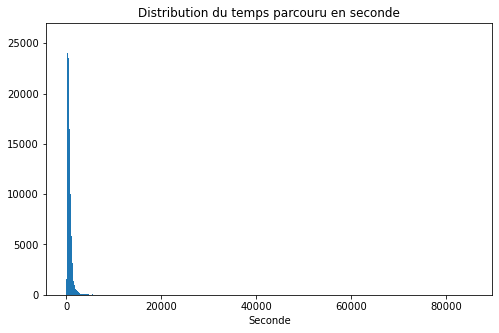

In [4]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Seconde')
plt.title('Distribution du temps parcouru en seconde')
plt.show()

Ce graphique n'est pas claire. C'est pourquoi nous faisons recours à la distribution logarithmique

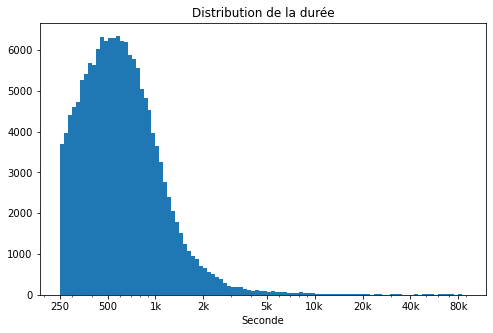

In [5]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([250,500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [250,500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('Seconde')
plt.title('Distribution de la durée')
plt.show()

Avec la distribution logarithmique, nous avons pu clairement observer la répartition du temps passé sur un seul trajet. Et nous pouvons remarquer que la majorité se situe la partie gauche du graphique 

### La distribution des participants

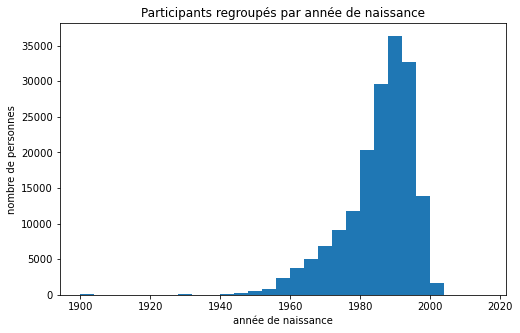

In [6]:
binsize = 4
bins = np.arange(1900, 2019, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlabel('année de naissance')
plt.ylabel('nombre de personnes')
plt.title('Participants regroupés par année de naissance')
plt.show()

Le système de partage acceuille beaucoup plus les jeunes adultes (Ceux qui sont nés entre 1980 et 2000)

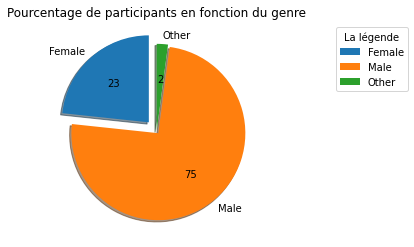

In [7]:
plt.figure(figsize = (10,4))
saison = np.sort((df.query('member_gender != "Unknown"'))['member_gender'].unique())
explode = np.random.uniform(0,0.15,len(saison))
plt.pie(np.array((df.query('member_gender != "Unknown" & member_birth_year > -1000')).groupby('member_gender')['member_gender'].count()), labels = saison, shadow = True, startangle=90, explode= explode, autopct='%.f')
plt.title('Pourcentage de participants en fonction du genre')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper left',title = 'La légende')
plt.show()

Les hommes sont les plus actifs dans ce système

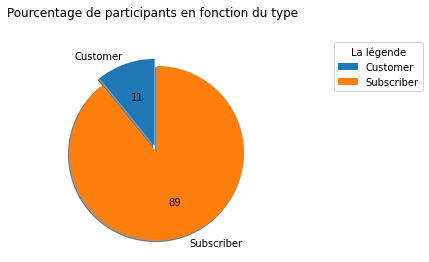

In [8]:
plt.figure(figsize = (10,4))
saison = np.sort(df['user_type'].unique())
explode = np.random.uniform(0,0.15,len(saison))
plt.pie(np.array(df.groupby('user_type')['user_type'].count()), labels = saison, shadow = True, startangle=90, explode= explode, autopct='%.f')
plt.title('Pourcentage de participants en fonction du type \n')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper left',title = 'La légende')
plt.show()

Pour clore, nous remarquons qu'il y a plus d'abonnés que des clients 

### Discussion des distributions des variables 'duration_sec', 'member_gender', 'member_birth_year' et 'user_type'






> Nous avons eu un bon apercu de toutes les variables et avons pu déterminer que :
- <span style="color:green">La distribution de la durée d'un trajet est assez restreinte à une plage</span>
- <span style="color:green">Le système est plus utilisé par les jeunes de 19 à 39 que toutes les autres tranches d'âge.</span>
- <span style="color:green">Les hommes sont plus nombreux</span>
- <span style="color:green">Les abonnés sont plus nombreux que les clients</span>

<a id='bivariee'></a>
## <span style="color:blue">Exploration bivariée</span>

### Les corrélations

Nous commencerons par déterminier les corrélations entre les variables numériques à notre disposition

In [9]:
numeric_vars = ['duration_sec','bike_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']

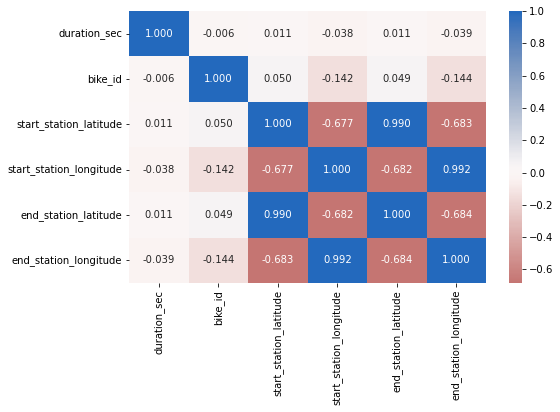

In [10]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Nous observons une forte corrélation entre :
- 'start_station_latitude' et 'end_station_latitude'
- 'start_station_longitude' et 'end_station_longitude'

df.shape= (183412, 16)
df_samp.shape= (500, 16)


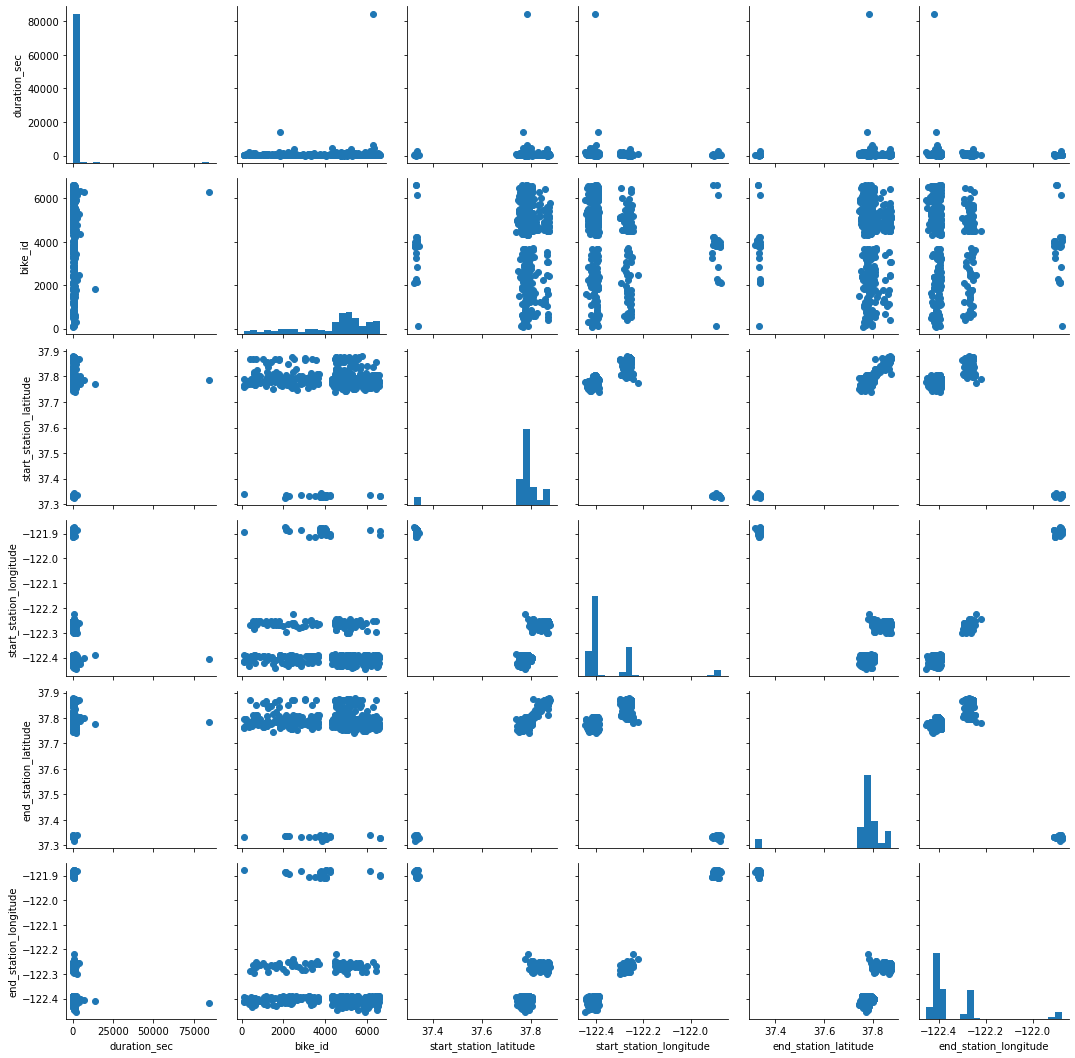

In [11]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

intéressons nous maintenant à notre variable importante qui est la durée du trajet ('duration_sec')

<Figure size 720x720 with 0 Axes>

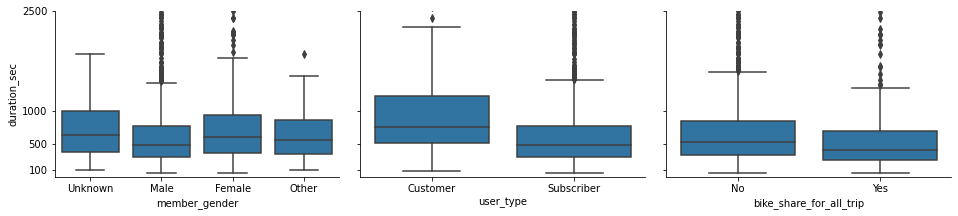

In [12]:
tmp = df.sample(n=2000, replace = False)


def draw(a, b, **kwargs):
    couleur = sns.color_palette()[0]
    sns.boxplot(x=a, y=b, color=couleur)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = tmp, y_vars = ['duration_sec'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(draw)
plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.show();

### L'âge et la durée

Passons maintenant aux variables qui nous intéressent. Voyons s'il existe une correlation entre l'âge et la durée du trajet

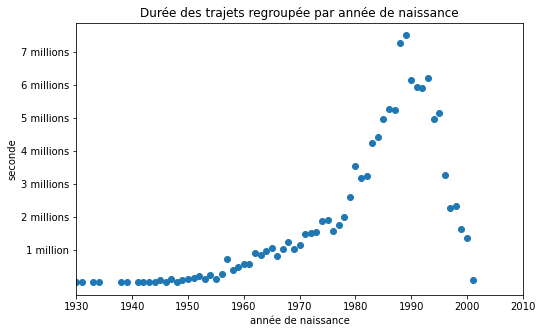

In [13]:
plt.figure(figsize=[8, 5])
plt.scatter(np.sort((df.query('member_birth_year > -1000')).member_birth_year.unique()),((df.query('member_birth_year > -1000')).groupby('member_birth_year')['duration_sec'].sum().reset_index().sort_values(by='member_birth_year')).duration_sec)
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6], ['1 million', '2 millions', '3 millions', '4 millions', '5 millions', '6 millions', '7 millions'])
plt.title('Durée des trajets regroupée par année de naissance')
plt.show()

De ce graphique, nous pouvons apprendre que l'âge y est bien pour beaucoup dans la distance parcourue. La courbe atteint son pic vers les années 1985-1995. cette étude ayant été faite en 2019, la population de ces années là a entre 14-24 ans. Ceci pour montrer que qu'en terme de distance parcouru, les jeunes adultes sont en tête de liste.

Et pourtant, nous n'allons pas nous limiter là. Nous ferons de nouveau la comparaison mais cette fois-ci en terme de moyenne



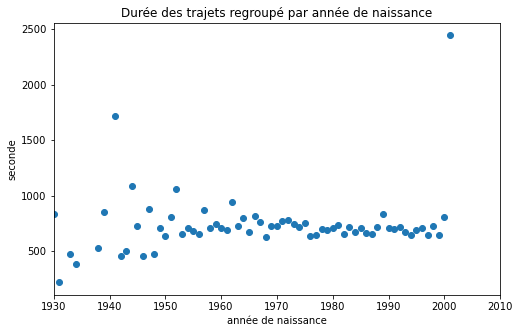

In [14]:
plt.figure(figsize=[8, 5])
plt.scatter(np.sort((df.query('member_birth_year > -1000')).member_birth_year.unique()),((df.query('member_birth_year > -1000')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec)
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.title('Durée des trajets regroupé par année de naissance')
plt.show()

<span style="color:red">Le résultat est intéresant !</span>

Dans la moyenne, toutes les catégories d'âge ont une durée de trajet constante bien que les plus agés se démarquent du lot

<span style="color:green">Ce graphique confirme que l'âge a un impact significatif sur la durée du trajet</span>

### Le genre et la durée

Passons maintenant à la variable 'member_gender'

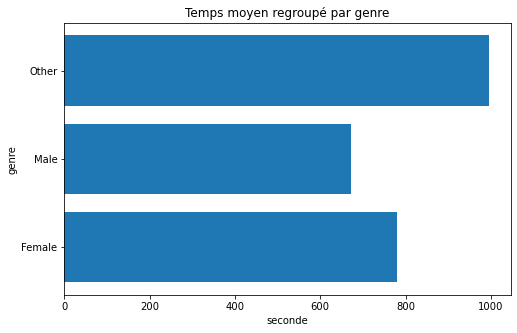

In [15]:
plt.figure(figsize=[8, 5])
plt.barh(np.sort(df.query('member_gender != "Unknown" & member_birth_year > -1000').member_gender.unique()), ((df.query('member_gender != "Unknown" & member_birth_year > -1000')).groupby('member_gender')['duration_sec'].mean().reset_index().sort_values(by='member_gender')).duration_sec )
plt.xlabel('seconde')
plt.ylabel('genre')
plt.title('Temps moyen regroupé par genre')
plt.show()

<Figure size 720x720 with 0 Axes>

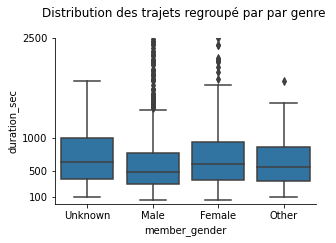

In [16]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = tmp, y_vars = ['duration_sec'], x_vars = ['member_gender'],
                height = 3, aspect = 1.5)
g.map(draw)
plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.title('Distribution des trajets regroupé par par genre \n')
plt.show();

les hommes bien qu'étant plus nombreux ont la moyenne la plus faible. Contrairement par exemple, aux femmes. 

<span style="color:green">Ainsi nous pouvons affirmer  que les hommes moins de temps sur un vélo comparé aux autres </span>


### Le type et la durée

Ensuite, nous étudierons la relation entre le trajet et le type d'utilisateur (user_type).

Est-ce le fait d'être 'suscriber' ou 'customer' a un impact sur le trajet parcouru ?

In [17]:
tmp = df.groupby("user_type")["duration_sec"].mean().reset_index()
tmp

,user_type,duration_sec
0,Customer,1432.465019
1,Subscriber,640.263678


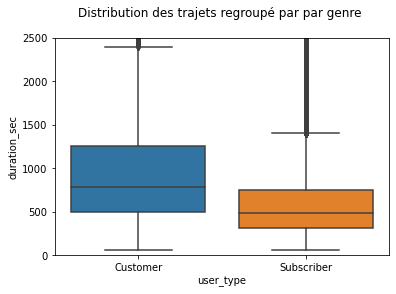

In [18]:
plt.figure(figsize = [6, 4])
sns.boxplot(data=df, x='user_type', y='duration_sec')
#plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.title('Distribution des trajets regroupé par par genre \n')
plt.show();

<span style="color:green">Bien qu'étant moins nombreux, les clients passent en moyenne plus de temps que les abonnés sur un vélo</span>

### Les observations

> Ce que nous pouvons tirer comme observation est que :

-<span style="color:green">L'âge est très important dans notre capacité à supporter des longues durées. Il est un indicateur de performance très important</span>

-<span style="color:green">Le genre, bien qu'il soit important, reste tout de même moins pertinent étant donné que la plus grande différence de moyenne se joue à environ 400 secondes. Nous pouvons tout de même remarqué que les hommes sont enclins à fournir moins d'effort que les autres.</span>

<span style="color:green">Contrairement au genre, le type est important car il montre une différence assez nette entre les abonnés et les clients. Les clients ont plus tendance à faire plus que les habitués</span>

<a id='multivariee'></a>
## <span style="color:blue">Exploration multivariée</span>

Dans cette partie, nous verrons l'impact de plusieurs variables mises ensemble sur notre variable d'étude.

### La durée, l'âge et le type

In [19]:
tmp = df.groupby(['member_birth_year','user_type'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

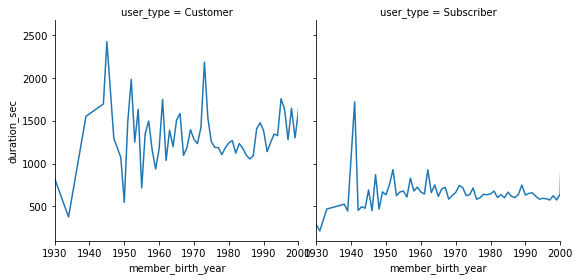

In [20]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=tmp, col='user_type', size=4)
g.map(plt.plot, 'member_birth_year', 'duration_sec')
plt.xlim([1930,2000])
plt.show();

Au fil du temps :
- <span style="color:green"> La moyenne des clients (Customer) évoluent en dent de scie</span>
- <span style="color:green"> Les abonnés malgré les différences d'âge ont un rythme constant</span>

### La durée, l'âge et le genre

In [21]:
tmp = df.groupby(['member_birth_year','member_gender'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

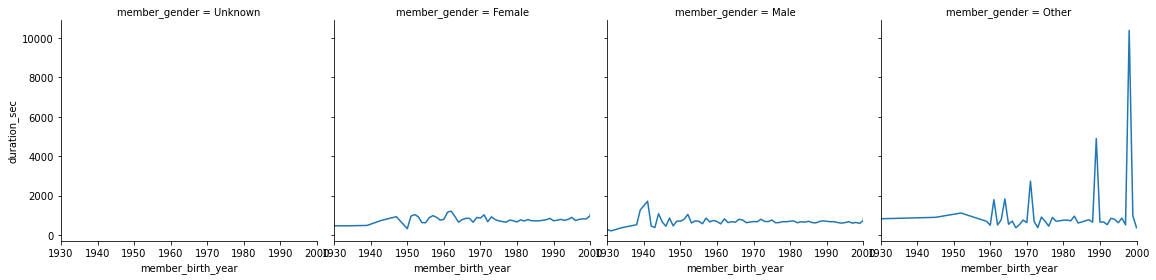

In [22]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=tmp, col='member_gender', size=4)
g.map(plt.plot, 'member_birth_year', 'duration_sec')
plt.xlim([1930,2000])
plt.show();

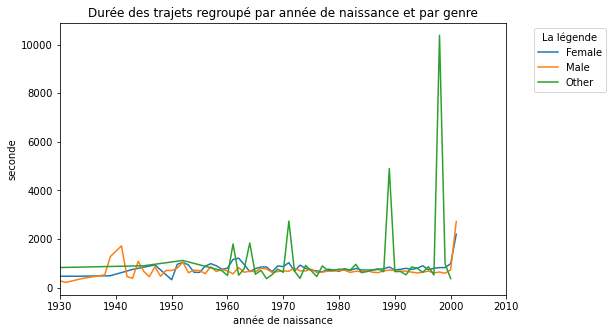

In [23]:
plt.figure(figsize=[8, 5])
# -- on enlève les valeurs abbérantes --
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Female"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Female"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Female')
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Male"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Male"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Male')
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Other"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Other"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Other')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title = 'La légende')
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.title('Durée des trajets regroupé par année de naissance et par genre')
plt.show();

>Compte tenu du fait que le graphique est compris entre 1930 et 2000, le genre "Unknow" n'a pas été considéré.

Dans ces graphiques, nous observons que :
- <span style="color:green"> La moyenne du genre 'Other' est plus elévée quand la population est de plus en plus jeune</span>
- <span style="color:green"> Les hommes, tout comme les femmes, ont un rythme constant avec un léger avantage pour ces dernières.</span>

### La durée, le type et le genre

In [24]:
tmp = df.groupby(['user_type','member_gender'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

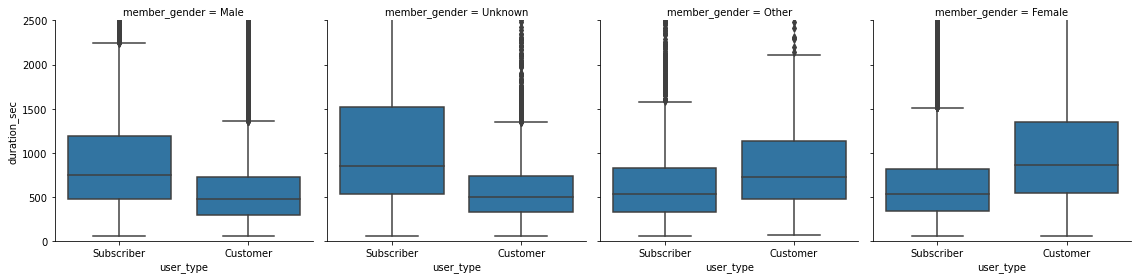

In [25]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=df, col='member_gender', size=4)
g.map(sns.boxplot, 'user_type', 'duration_sec')
plt.ylim([0,2500])
plt.show();



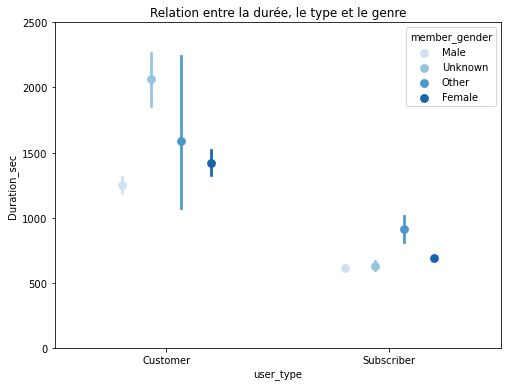

In [26]:
plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Relation entre la durée, le type et le genre')
plt.ylabel('Duration_sec')
plt.ylim([0,2500])
plt.show();

Bien que les clients, en général, ont une moyenne supérieure aux abonnés, nous pouvons tout de même ressortir que les abonnés de genre 'Other' ou 'Female' sont plus actif que leurs homologues clients. 

<a id='conclusion'></a>
## <span style="color:blue">Conclusion</span>

Arrivé au terme de notre projet, nous avons pu ressortir les observations suivantes :



> L'exploration univariée :

- <span style="color:green">La distribution de la durée d'un trajet est assez restreinte à une plage</span>
- <span style="color:green">Le système est plus utilisé par les jeunes de 19 à 39 que toutes les autres tranches d'âge.</span>
- <span style="color:green">Les hommes sont plus nombreux</span>
- <span style="color:green">Les abonnés sont plus nombreux que les clients</span>





> L'exploration bivariée :

- <span style="color:green">L'âge est très important dans notre capacité à supporter des longues durées. Il est un indicateur de performance très important</span>

- <span style="color:green">Le genre, bien qu'il soit important, reste tout de même moins pertinent étant donné que la plus grande différence de moyenne se joue à environ 400 secondes. Nous pouvons tout de même remarqué que les hommes sont enclins à fournir moins d'effort que les autres.</span>

- <span style="color:green">Contrairement au genre, le type est important car il montre une différence assez nette entre les abonnés et les clients. Les clients ont plus tendance à faire plus que les habitués</span>

> L'exploration multivariée :

- <span style="color:green"> La moyenne des clients (Customer) évoluent en dent de scie</span>
- <span style="color:green"> Les abonnés malgré les différences d'âge ont un rythme constant</span>
- <span style="color:green"> La moyenne du genre 'Other' est plus elévée quand la population est de plus en plus jeune</span>
- <span style="color:green"> Les hommes, tout comme les femmes, ont un rythme constant avec un léger avantage pour ces dernières.</span>
- <span style="color:green">Bien que les clients, en général, ont une moyenne supérieure aux abonnés, nous pouvons tout de même ressortir que les abonnés de genre 'Other' ou 'Female' sont plus actif que leurs homologues clients.</span>